In [176]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [177]:
def drawlinegraph(G, Xin, Xout, algo1="Algo1", algo2="Algo2"):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(15, 6))
    axIN = plt.subplot2grid(gridsize, (0, 0))
    plt.axis('off')
    axIN.set_title(algo1)
    axOUT = plt.subplot2grid(gridsize, (0, 1))
    axOUT.set_title(algo2)
    
    axIN.set_xlim(min(Xin[:,0]), max(Xin[:,0]))
    axIN.set_ylim(min(Xin[:,1]), max(Xin[:,1]))
    axOUT.set_xlim(min(Xout[:,0]), max(Xout[:,0]))
    axOUT.set_ylim(min(Xout[:,1]), max(Xout[:,1]))
    linesIN = []
    linesOUT = []
    e = 0
    for i,j in zip(*graph.nonzero()):
        if i>j:
            linesIN.append([Xin[i], Xin[j]])
            linesOUT.append([Xout[i], Xout[j]])
            e += 1
    print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
    lcIN = mc.LineCollection(linesIN, linewidths=.3, colors='#0000007f')
    lcOUT = mc.LineCollection(linesOUT, linewidths=.3, colors='#0000007f')
    axIN.add_collection(lcIN)
    axOUT.add_collection(lcOUT)
    plt.axis('off')

In [178]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [208]:
#filename = "datasets/input/3elt_dual.mtx" 
filename = "datasets/input/grid2_dual.mtx" 
#filename = "datasets/input/power.mtx" 
#filename = "datasets/input/sf_ba6000.mtx" 

graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [188]:
nx.write_gml(G,"datasets/input/sf_ba6000.gml")

In [189]:
from collections import OrderedDict
def readCoordinatesFromGML(graph):
    gfile = open(graph, "r")
    ofile = open(graph+".txt", "w")
    coordinates = OrderedDict()
    for line in gfile.readlines():
        line = line.strip()
        if "id" in line:
            nid = line.split(" ")[1]
        elif "x" in line:
            x = line.split(" ")[1]
        elif "y" in line:
            y = line.split(" ")[1]
            coordinates[nid] = x + "\t" + y
            ofile.write(coordinates[nid]+"\n")
    gfile.close()
    ofile.close()

In [182]:
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/power.openord_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.openord_600.gml")

In [209]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [210]:
algo1 = readCoordinates("datasets/output/grid2_dual.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2 = readCoordinates("datasets/output/grid2_dual.mtxCACHEMINB256PARAOUTRAND600.txt")

In [211]:
openord = readCoordinates("datasets/output/grid2_dual.openord_600.gml.txt")
forceatlas2 = readCoordinates("datasets/output/grid2_dual.forceatlas2_600.gml.txt")
forceatlas2bh = readCoordinates("datasets/output/grid2_dual.forceatlas2_BH_600.gml.txt")

Total edges =  6112  Average Degree: 3.8979591836734695


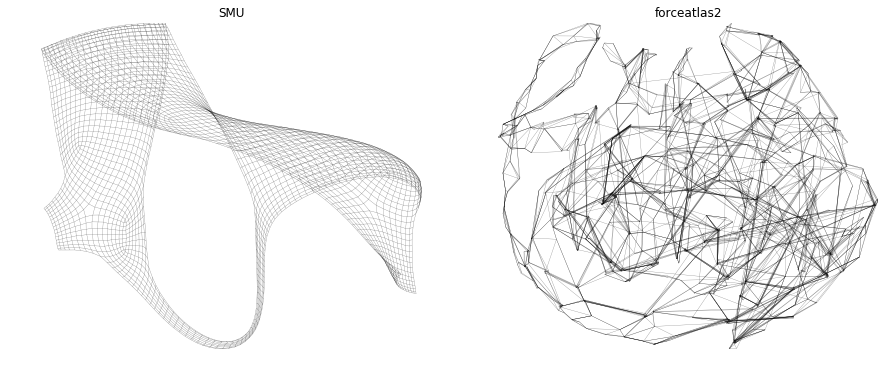

In [214]:
drawlinegraph(G, algo2, openord, "SMU", "forceatlas2")

In [41]:
#nx.draw_networkx(openord, node_size=1.2, with_labels=False, alpha=0.4)

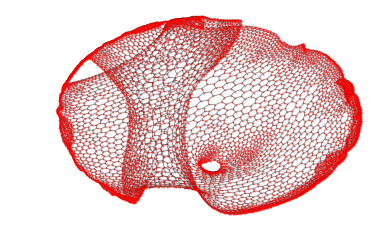

In [42]:
drawnetworkxgraph(G, algo1, 1.2, 0.4)

In [64]:
def convertToGraphML(G, pos, filename):
    if len(G) > 0:
        pos = dict(enumerate(pos))
        for node, val in pos.items():
            x = val[0]
            y = val[1]
            G.node[node]['x'] = float(x)
            G.node[node]['y'] = float(y)
    nx.write_graphml(G, filename)

In [66]:
coordinates = readCoordinates("datasets/output/3elt_dual.mtxSEQUADJ600.txt")

In [71]:
outputgmlfile = "datasets/output/3elt_dual.mtxSEQUADJ600.graphml"
convertToGraphML(G, coordinates, outputgmlfile)
#After this run following perl command
#perl -pe 's/d0/x/g;s/d1/y/g;' 3elt_dual.mtxSEQUADJ600.graphml > 3elt_dual.mtxSEQUADJ600.SMU.graphml
command = "perl -pe 's/d0/x/g;s/d1/y/g;' " + outputgmlfile +" > "+ outputgmlfile + ".SMU.graphml"
os.system(command)
os.system("rm " + outputgmlfile)

0